# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [94]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Ari\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


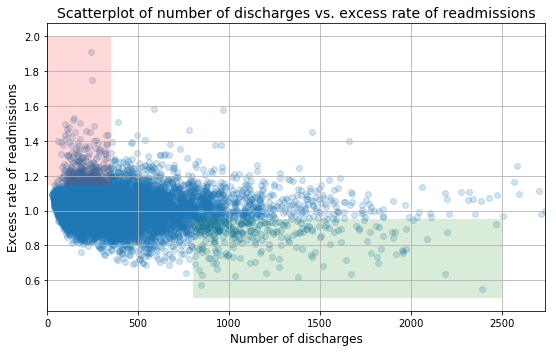

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [5]:
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# A) Critique of Initial Analysis

In order to investigate the validity of each claim stated in the preliminary report we will use visualizations, and stats test where necessary to verify and qualify.

## Response to A. Initial observations based on plot above
- Overall, rate of readmissions is trending down with increasing number of discharges

Before the trend of any data is discussed it should be clarified that rate of readmissions is actually not what is presented in the scatterplot of the initial report. Instead excess readmission ratio is used, which adjusts excess readmission rate based on the discharges of a hospital. This normalizes the data and allows us to compare hospitals of different size because it eliminates the obvious increase in readmission rate due to simply processing more patients (larger hospital).

A scatterplot with a linear regression line can be used to visualize the trend of discharge rate and excess readmission ratio.

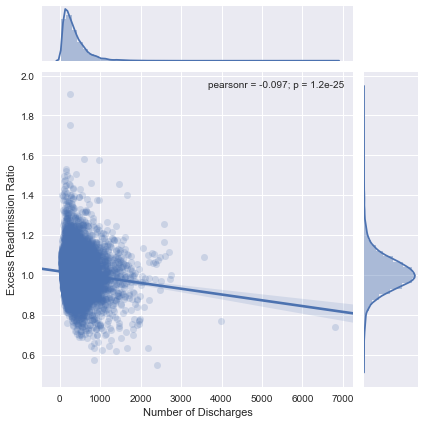

In [6]:
sns.jointplot('Number of Discharges','Excess Readmission Ratio', data = clean_hospital_read_df, kind = 'reg', scatter_kws={'alpha':.2})

The above plot shows a weak negative correlation (-.1) between number of discharges and excess readmission ratio. It does appear there are several outliers in both number of discharges and excess readmission ratio. These outliers can be visualized using a boxplot and then the correlation can be retested.

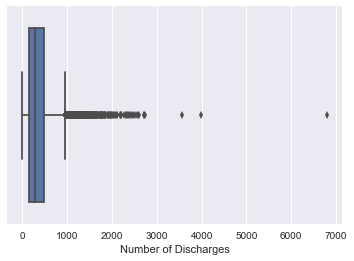

In [7]:
sns.boxplot('Number of Discharges', data = clean_hospital_read_df)

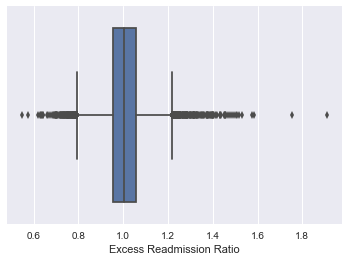

In [8]:
sns.boxplot('Excess Readmission Ratio', data = clean_hospital_read_df)

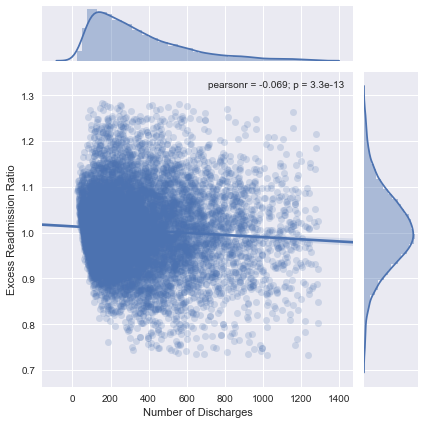

In [9]:
x = clean_hospital_read_df[((clean_hospital_read_df['Number of Discharges'] - clean_hospital_read_df['Number of Discharges'].mean()) / clean_hospital_read_df['Number of Discharges'].std()).abs() < 3]
x = x['Number of Discharges']
y = clean_hospital_read_df[((clean_hospital_read_df['Excess Readmission Ratio'] - clean_hospital_read_df['Excess Readmission Ratio'].mean()) / clean_hospital_read_df['Excess Readmission Ratio'].std()).abs() < 3]
y = y['Excess Readmission Ratio']

sns.jointplot(x,y, kind = 'reg', scatter_kws={'alpha':.2})

With outliers removed the correlation decreases to -.07 and remains a very weak correlation with a significant p-score <<.01 . The originial claim in the report is correct, but stating the magnitude of the correlation is highly important, especially when it is weak.

+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

The original visualization included in the report does not accurately display incidence of readmission rate in a comparative manner. In order to visualize how the disribution of readmission rate changes in the areas indicated by the report we can use a combined hisogram/kde estimation to visually compare distributions accurately against the total distribution (colored blue).

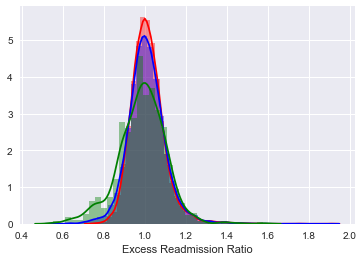

In [10]:
#Red <350
red_shaded = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <= 350]
green_shaded = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 800) &
                                     (clean_hospital_read_df['Number of Discharges'] < 2500)]
sns.distplot(red_shaded['Excess Readmission Ratio'].dropna(), color = 'r')
sns.distplot(clean_hospital_read_df['Excess Readmission Ratio'].dropna(), color = 'b')
sns.distplot(green_shaded['Excess Readmission Ratio'].dropna(), color = 'g')

It visually appears that the mean remains similar between the red-shaded/green-shaded and total (blue-shaded) distributions. Additionally, the shape of the red and blue distributions appears similar tracing the same slight right skew. To test the validity of the claim that the incidence of excess rate of readmission (readmission ratio > 1) is higher in the red shaded portion requires numerical testing. A similar test will be used to test the claim that incidence of lower rate of readmissions (readmission ratio < 1) is higher in the green-shaded area.

In [11]:
len(red_shaded[red_shaded['Excess Readmission Ratio'] > 1])/len(red_shaded)

0.5267983074753173

In [12]:
pop_excess = len(clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] > 1])/len(clean_hospital_read_df)
pop_excess

0.5129556054586284

It appears that the incidence rate of excessive readmissions is higher in the red-shaded portion, but the difference is slight. To confirm if this effect is significant we can use a binomial test, where the expected incidence rate = incidence rate of excessive readmissions in total sample.

In [13]:
stats.binom_test(x = len(red_shaded[red_shaded['Excess Readmission Ratio'] > 1]),
                n = len(red_shaded),
                p = pop_excess,
                alternative = 'greater')

0.010153066733943667

The binomial test indicates that the small difference in incidence of excessive readission rate is significant at an alpha of .05

It is still very important to recognize the effect size. The total sample has an incidence of excess readmission rate at 51.3 % while the red shaded portion is at 52.7%.

In [14]:
len(green_shaded[green_shaded['Excess Readmission Ratio'] < 1])/len(green_shaded)

0.5286839145106862

In [15]:
pop_recess = len(clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] < 1])/len(clean_hospital_read_df)
pop_recess

0.47909828986007946

In [16]:
stats.binom_test(x = len(green_shaded[green_shaded['Excess Readmission Ratio'] < 1]),
                 n = len(green_shaded),
                 p = pop_recess,
                 alternative = 'greater')

0.001725285333656302

The green-shaded area does indeed have a higher incidence of recessive readmission rates (excessive readmission ratio < 1). Using the binomial test this effect is found to be significant at an alpha of .01

The incidence of recessive readmission rates is 52.9% in the green-shaded portion while the total sample has a rate of 47.9%

## Response to B. Statistics
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [17]:
small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
print(small['Excess Readmission Ratio'].mean())
len(small[small['Excess Readmission Ratio'] > 1])/len(small) * 100

1.0226183501683506


59.18045705279747

In [18]:
large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
print(large['Excess Readmission Ratio'].mean())
len(large[large['Excess Readmission Ratio'] > 1])/len(large) * 100

0.9783354211663071


44.49244060475162

There is no issue with the statistics presented in the report, but these limited statistics are not sufficient to make any conclusions. Presentations of means and incidence of excess readmission rates must be accompanied by significance using statistical testing.

## Response to **C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 

While it is true that the correlation between hospital capacity is signficant (at an alpha level of .01), it is also misleading to not mention that this is a ***very*** weak correlation. Those not well-versed in statistics or even anyone not reading critically may mistake the significance of the correlation for the magnitude of the correlation.

+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

There are several possible hypotheses for why smaller hospitals may have higher readmission rates than larger hospitals and extrapolating the cause of this observed difference is not possible with the provided data. Linking resources of smaller hospitals causally to their readmission rates requires further data and control for other influencing factors, like geographic location, patient socio-economic status, etc.

The other issue with this statement is it's imprecise wording, small needs to be accompanied by a numerical figure (<300 or <100). Also the explicit difference in readmission ratios should be stated with an acomapanying statement of significance at some alpha level. To provide these additional details, further statistical testing will be completed.


## Response to D. Regulatory policy recommendations 
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

This recommendation is not justifiable with the data available for analysis. In order to get a clearer idea of the causal links behind readmission rates and resources, direct data relating to hospital resources and allocation must be explicitly measured. The current recomendation assumes causal links that have not been explicitly confirmed through any type of analysis.

+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

Again this recommendation is not justifiable with current data available. The effects of combining hospitals has been unstudied, and the assumption that two combined small hospitals have an equivalent behavior to a medium hospital is problematic without any data.

# B) Extended Statistical Analysis and Updated Conclusions/Recommendations

The extended statistical analysis will determine what the difference in mean excess readmission ratios is between small, medium and large capacity hospitals.

Comparing the means of multiple samples is accomplished using the ANOVA test which has the following assumptions (from scipy.stats docs):

- The samples are independent.
- Each sample is from a normally distributed population.
- The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

Instead of using arbitrary cutoffs for small, medium, and large hospitals are designations will be based on quantiles. By splitting the data into 3 sections by quantiles we have equal sample sizes (which is not a requirement for ANOVA but nice to have).

In [51]:
clean_hospital_read_df['Number of Discharges'].quantile([.33, .66])

0.33    192.41
0.66    387.00
Name: Number of Discharges, dtype: float64

In [52]:
small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 192.41]
medium = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] >= 192.41) & (clean_hospital_read_df['Number of Discharges'] <= 387)]
large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 387]

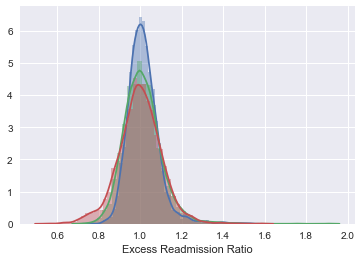

In [58]:
sns.distplot(small['Excess Readmission Ratio'].dropna())
sns.distplot(medium['Excess Readmission Ratio'].dropna())
sns.distplot(large['Excess Readmission Ratio'].dropna())

In [62]:
print(small['Excess Readmission Ratio'].std())
print(medium['Excess Readmission Ratio'].std())
large['Excess Readmission Ratio'].std()

0.07613732874685576
0.09157186834867996


0.1044648785594897

The groupings of hospitals violate the standard deviation requirement of standard ANOVA so we instead can use the Kruskal-Wallis H-test for independent samples. This tests the null hypothesis that all population medians are equivalent.

see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal

In [63]:
small_ratio = small['Excess Readmission Ratio'].dropna()
medium_ratio = medium['Excess Readmission Ratio'].dropna()
large_ratio = large['Excess Readmission Ratio'].dropna()
stats.kruskal(small_ratio, medium_ratio, large_ratio)

KruskalResult(statistic=42.534114092789906, pvalue=5.8054311440467425e-10)

The Kruskal-Wallis test yields a signficant p-value at an alpha-level of .01 so a post-hoc test must be used to identify exactly which groups have signficant differences.

In [64]:
# Tukey Post-Hoc test chosen from statsmodel
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [82]:
def hospital_size(x):
    if x < 192.41:
        return 'small'
    elif 192.41 <= x <= 387:
        return 'medium'
    else:
        return 'large'

In [95]:
clean_hospital_read_df['size'] = clean_hospital_read_df['Number of Discharges'].apply(hospital_size)

In [98]:
clean_hospital_read_df.dropna(subset = ['Excess Readmission Ratio'], inplace = True)

In [103]:
result = pairwise_tukeyhsd(clean_hospital_read_df['Excess Readmission Ratio'], clean_hospital_read_df['size'])
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
large  medium  0.0126   0.0077 0.0174  True 
large  small   0.0169   0.012  0.0218  True 
medium small   0.0043  -0.0006 0.0093 False 
--------------------------------------------


The Tukey-HSD test reveals that there is a significant difference of .01-.02 in excess readmission ratio when you compare the small/medium groupings of hospitals to large hospitals. Although this result appears to support the preliminary report's conclusion on the relationship between hospital size and readmission ratios my recommendations based on the results are different.

There is not enough analysis to suggest an intervention based on hospital size especially considering there have not been any controls for geographic location, or other influencing factors. Before any recommendations are implemented further analysis must be done to control for other influencing factors. An apparent factor in this dataset is location (indicated by state), but there are several others (patient socio-economic status/insurance status/etc.).